## Observations and Insights 

I.
II.
III.
IV.Although Infubinol had the largest range between its lowest and highest tumor volume observations (i.e., the largest whiskers), it did not have the most outliers in its data. Capomulin had the most outliers in tumor volume. 

When a mouse was treated with Capomulin, the weight of the mouse was directly proportional to the tumor volume (i.e., the larger the weight of the mouse, the larger the tumor volume).

However, when comparing the tumor volume of a random mouse, Mouse ID = j119, treated with Capomulin, it is evident there is a steady decline of tumor volume. Overall, Capomulin proved to be an effective drug treatment.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_dataset = pd.merge(study_results, mouse_metadata,how="left",on="Mouse ID") 

# Display the data table for preview
merge_dataset


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
tot_mice_count = len(merge_dataset["Mouse ID"].unique())
tot_mice_count

print("The number of mice in the dataframe is " + str(tot_mice_count))

The number of mice in the dataframe is 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = merge_dataset.loc[merge_dataset.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"]
dup_mice


137     g989
360     g989
681     g989
869     g989
1111    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_data = merge_dataset.loc[merge_dataset["Mouse ID"]== 'g989']
dup_mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_dataset[merge_dataset['Mouse ID'].isin(dup_mice)==False]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice_cleandf = len(clean_df["Mouse ID"].unique())
num_mice_cleandf
print("The number of mice in the cleaned dataframe is " + str(num_mice_cleandf) + ". Note, the duplicated Mouse g989 was dropped due to data integrity issues")


The number of mice in the cleaned dataframe is 248. Note, the duplicated Mouse g989 was dropped due to data integrity issues


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_df
# This method is the most straighforward, creating multiple series and putting them all together at the end.
mean = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
mean

median = clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
median

variance = clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
variance

standard_dev = clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
standard_dev

SEM = clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
SEM

drug_df = pd.DataFrame({"Mean":mean,"Median":median,"Variance":variance, "Standard Deviation":standard_dev, "SEM": SEM})
drug_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
drug_df2 = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
drug_df2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

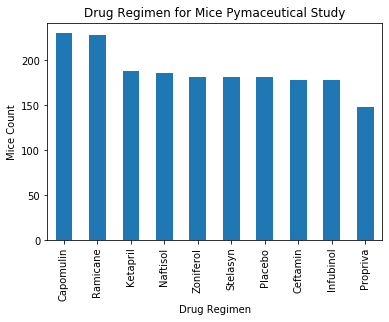

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
total_mice_num = clean_df["Drug Regimen"].value_counts()
total_mice_num.plot(kind ="bar")

#label the bar graph
plt.title("Drug Regimen for Mice Pymaceutical Study")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")
plt.show()


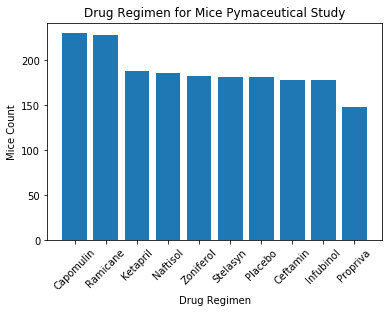

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(total_mice_num.index.values, total_mice_num.values)
plt.xticks(rotation = 45)

#label the bar graph 
plt.title("Drug Regimen for Mice Pymaceutical Study")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")
plt.show()


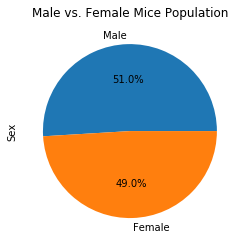

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_df['Sex'].value_counts()
gender.plot(kind ="pie", autopct='%1.1f%%')

#Label 
plt.title("Male vs. Female Mice Population")
plt.show()


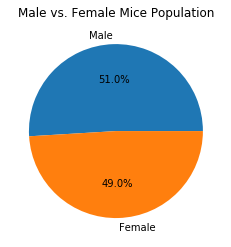

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender.values, labels = gender.index.values, autopct='%1.1f%%' )

#Label 
plt.title("Male vs. Female Mice Population")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
finalvol = clean_df[clean_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
finalvol
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = finalvol.groupby(["Mouse ID","Timepoint"]).max()
max_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(finalvol, max_timepoint, on = ["Timepoint", "Mouse ID"])
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Tumor Volume (mm3)_y,Metastatic Sites_y,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y
0,b128,0,45.000000,0,Capomulin,Female,9,22,45.000000,0,Capomulin,Female,9,22
1,c326,0,45.000000,0,Infubinol,Female,18,25,45.000000,0,Infubinol,Female,18,25
2,c139,0,45.000000,0,Infubinol,Male,11,28,45.000000,0,Infubinol,Male,11,28
3,v339,0,45.000000,0,Infubinol,Male,20,26,45.000000,0,Infubinol,Male,20,26
4,a577,0,45.000000,0,Infubinol,Female,6,25,45.000000,0,Infubinol,Female,6,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,a644,45,32.978522,1,Ramicane,Female,7,17,32.978522,1,Ramicane,Female,7,17
810,i177,45,33.562402,3,Ramicane,Male,10,18,33.562402,3,Ramicane,Male,10,18
811,r944,45,41.581521,2,Capomulin,Male,12,25,41.581521,2,Capomulin,Male,12,25
812,u364,45,31.023923,3,Capomulin,Male,18,17,31.023923,3,Capomulin,Male,18,17


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# "Capomulin"
cap_tumor = merge_df.loc[merge_df["Drug Regimen_x"] == "Capomulin"]
cap_tumor = cap_tumor["Tumor Volume (mm3)_x"]

capquartiles = cap_tumor.quantile([0.25,.5,.75])
caplowerq = capquartiles[0.25]
capupperq = capquartiles[0.75]
capiqr = capupperq-caplowerq

# "Ramicane"
ram_tumor = merge_df.loc[merge_df["Drug Regimen_x"] == "Ramicane"]
ram_tumor = ram_tumor["Tumor Volume (mm3)_x"]

ramquartiles = ram_tumor.quantile([0.25,.5,.75])
ramlowerq = ramquartiles[0.25]
ramupperq = ramquartiles[0.75]
ramiqr = ramupperq-ramlowerq

# "Infubinol"
inf_tumor = merge_df.loc[merge_df["Drug Regimen_x"] == "Infubinol"]
inf_tumor = inf_tumor["Tumor Volume (mm3)_x"]

infquartiles = inf_tumor.quantile([0.25,.5,.75])
inflowerq = infquartiles[0.25]
infupperq = infquartiles[0.75]
infiqr = infupperq-inflowerq

# "Ceftamin"
cef_tumor = merge_df.loc[merge_df["Drug Regimen_x"] == "Ceftamin"]
cef_tumor = cef_tumor["Tumor Volume (mm3)_x"]

cefquartiles = cef_tumor.quantile([0.25,.5,.75])
ceflowerq = cefquartiles[0.25]
cefupperq = cefquartiles[0.75]
cefiqr = cefupperq-ceflowerq
    
    
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
tumor_volume_data = [cap_tumor, ram_tumor, inf_tumor, cef_tumor]    
    
# Determine outliers using upper and lower bounds

# Determine outliers using upper and lower bounds
#upper_bound = upperq + (1.5*iqr)
#lower_bound = lowerq - (1.5*iqr)

# Capomulin
caplower_bound = caplowerq - (1.5*capiqr)
capupper_bound = caplowerq + (1.5*capiqr)
cap_outlier = cap_tumor.loc[(cap_tumor < caplower_bound) | (cap_tumor > capupper_bound )]

# Ramicane
ramlower_bound = ramlowerq - (1.5*ramiqr)
ramupper_bound = ramlowerq + (1.5*ramiqr)
ram_outlier = ram_tumor.loc[(ram_tumor < ramlower_bound) | (ram_tumor > ramupper_bound )]

# Infubinol
inflower_bound = inflowerq - (1.5*infiqr)
infupper_bound = inflowerq + (1.5*infiqr)
inf_outlier = inf_tumor.loc[(inf_tumor < inflower_bound) | (inf_tumor > infupper_bound )]

# Ceftamin
ceflower_bound = ceflowerq - (1.5*cefiqr)
cefupper_bound = ceflowerq + (1.5*cefiqr)
cef_outlier = cef_tumor.loc[(cef_tumor < ceflower_bound) | (cef_tumor > cefupper_bound )]

print("There are 37 outliers")

print (cap_outlier)
print (ram_outlier)
print (inf_outlier)
print (cef_outlier)



There are 37 outliers
703    25.472143
794    23.343598
Name: Tumor Volume (mm3)_x, dtype: float64
782    22.050126
Name: Tumor Volume (mm3)_x, dtype: float64
542    64.149871
636    64.925420
680    67.821420
714    63.593490
733    64.138725
737    63.095076
740    67.289621
744    69.428141
747    63.620680
762    67.685569
764    72.226731
765    62.754451
766    65.525743
768    66.196912
771    66.083066
777    62.435404
778    67.973419
Name: Tumor Volume (mm3)_x, dtype: float64
641    63.430632
673    63.329330
711    63.844858
716    66.622836
721    62.187950
722    64.192341
736    63.469549
749    64.251028
754    64.729837
755    68.594745
758    61.849023
769    67.527482
781    67.748662
797    64.634949
798    62.999356
800    68.923185
803    64.299830
Name: Tumor Volume (mm3)_x, dtype: float64


<function matplotlib.pyplot.show(*args, **kw)>

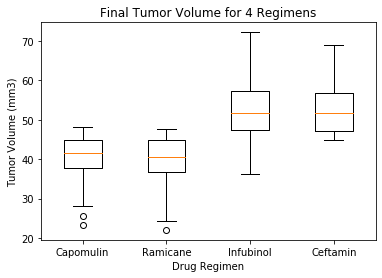

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
finalvolume = clean_df["Tumor Volume (mm3)"]
fig1,ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume for 4 Regimens')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

labels = [item.get_text() for item in ax1.get_xticklabels()]
labels[0] = "Capomulin"
labels[1] = "Ramicane"
labels[2] = "Infubinol"
labels[3] = "Ceftamin"
ax1.set_xticklabels(labels)
ax1.boxplot(tumor_volume_data)
plt.show

## Line and Scatter Plots

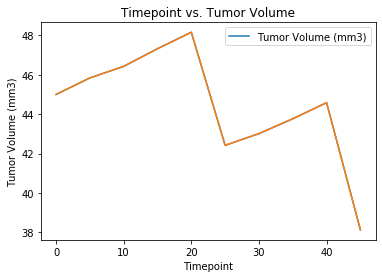

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capo = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
capo
mouse_j119 = capo.loc[capo["Mouse ID"] == "j119"]
mouse_j119
line_plot = mouse_j119[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]


x_axis = mouse_j119["Timepoint"]
y_axis = mouse_j119["Tumor Volume (mm3)"]

lines = line_plot.plot.line(x="Timepoint")
lines.set_xlabel("Timepoint")
lines.set_ylabel("Tumor Volume (mm3)")
lines.set_title("Timepoint vs. Tumor Volume")

plt.plot(x_axis, y_axis)
plt.show()

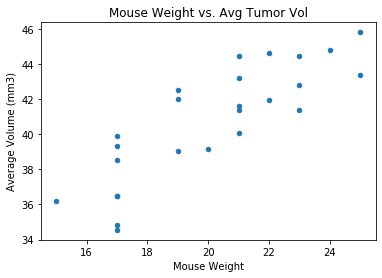

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capo_avg = capo.groupby("Mouse ID").mean()

x_axis = capo_avg["Weight (g)"]
y_axis = capo_avg["Tumor Volume (mm3)"]

chart_df = pd.DataFrame({"Mouse Weight": x_axis, "Average Volume (mm3)": y_axis})
#plt.scatter(x_axis, y_axis)

chart_df.plot.scatter(x="Mouse Weight", y="Average Volume (mm3)", title = "Mouse Weight vs. Avg Tumor Vol")

## Correlation and Regression

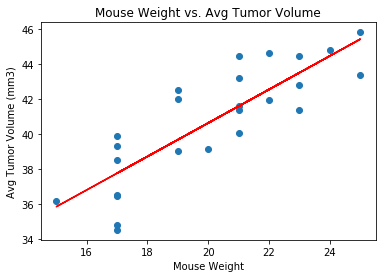

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

weight = chart_df.iloc[:0] 
vol = chart_df.iloc[:1] 

# Add dependency: from scipy.stats import linregress
x_values = chart_df["Mouse Weight"]
y_values = chart_df['Average Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept

linear_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regression, "r-" )
plt.xlabel("Mouse Weight")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Avg Tumor Volume")
plt.show()